In [79]:
cd '/Users/eswaroo/Downloads'

/Users/eswaroo/Downloads


In [80]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [81]:
train = pd.read_csv('train-1.csv')
test = pd.read_csv('test-1.csv')
songs = pd.read_csv('songs.csv')
members = pd.read_csv('members.csv')

In [82]:
print('Data preprocessing...')
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

Data preprocessing...


In [83]:
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))  ### converting integer to string
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

In [84]:
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

In [85]:
members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')

In [86]:
train.isnull().sum()

msno                        0
song_id                     0
source_system_tab       18371
source_screen_name     414804
source_type             21539
target                      0
artist_name               114
genre_ids              118455
song_length               114
language                  150
city                        0
bd                          0
gender                2961479
registered_via              0
expiration_date             0
registration_year           0
registration_month          0
registration_date           0
expiration_year             0
expiration_month            0
dtype: int64

In [87]:
test.isnull().sum()

id                          0
msno                        0
song_id                     0
source_system_tab        5096
source_screen_name     162883
source_type              7297
artist_name                25
genre_ids               42110
song_length                25
language                   42
city                        0
bd                          0
gender                1052224
registered_via              0
expiration_date             0
registration_year           0
registration_month          0
registration_date           0
expiration_year             0
expiration_month            0
dtype: int64

In [88]:
train = train.fillna(-1)
test = test.fillna(-1)

In [89]:
members.head()

,msno,city,bd,gender,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20,2011,8,20,2017,9
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,22,2015,6,28,2017,6
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,12,2016,4,11,2017,7
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,7,2015,9,6,2015,9
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,13,2017,1,26,2017,6


In [90]:
songs.head(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793,465,光良 (Michael Wong),光良,彭資閔,3.0
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0


In [91]:
print format(train.shape[0]) + ': training records'
train.head()

7377418: training records


,msno,song_id,source_system_tab,source_screen_name,source_type,target,artist_name,genre_ids,song_length,language,city,bd,gender,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,Bastille,359,206471.0,52.0,1,0,-1,7,5,2012,1,2,2017,10
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,Various Artists,1259,284584.0,52.0,13,24,female,9,11,2011,5,25,2017,9
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,Nas,1259,225396.0,52.0,13,24,female,9,11,2011,5,25,2017,9
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,Soundway,1019,255512.0,-1.0,13,24,female,9,11,2011,5,25,2017,9
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,Brett Young,1011,187802.0,52.0,1,0,-1,7,5,2012,1,2,2017,10


In [92]:
print format(test.shape[0])+':  test records'
test.head()

2556790:  test records


,id,msno,song_id,source_system_tab,source_screen_name,source_type,artist_name,genre_ids,song_length,language,city,bd,gender,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library,梁文音 (Rachel Liang),458,224130.0,3.0,1,0,-1,7,18,2016,2,19,2017,9
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library,林俊傑 (JJ Lin),465,320470.0,3.0,1,0,-1,7,18,2016,2,19,2017,9
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,-1,song-based-playlist,Yu Takahashi (高橋優),2022,315899.0,17.0,1,0,-1,4,24,2016,11,17,2016,11
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio,U2,465,285210.0,52.0,3,30,male,9,30,2007,7,25,2017,4
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio,Yoga Mr Sound,873,197590.0,-1.0,3,30,male,9,30,2007,7,25,2017,4


In [93]:
print("{:,} members".format(members.shape[0]))
members.head()

34,403 members


,msno,city,bd,gender,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20,2011,8,20,2017,9
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,22,2015,6,28,2017,6
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,12,2016,4,11,2017,7
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,7,2015,9,6,2015,9
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,13,2017,1,26,2017,6


In [94]:
print("{:,} songs".format(songs.shape[0]))
songs.head()

2,296,320 songs


,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [95]:
print 'target_value  : '+  format(np.unique(train['target']))

target_value  : [0 1]


In [96]:
print 'proportion_1:  '+ format(np.sum(train['target']==1)/float(train.shape[0])*100) + " % 1's "
print 'proportion_0:  '+ format(np.sum(train['target']==0)/float(train.shape[0])*100) + "%  0's "

proportion_1:  50.3517084161 % 1's 
proportion_0:  49.6482915839%  0's 


In [97]:
import matplotlib.pyplot as plt
import seaborn as sns


In [98]:
corr = train.corr()

In [99]:
sns.heatmap(corr,  xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.title('feature correlations')

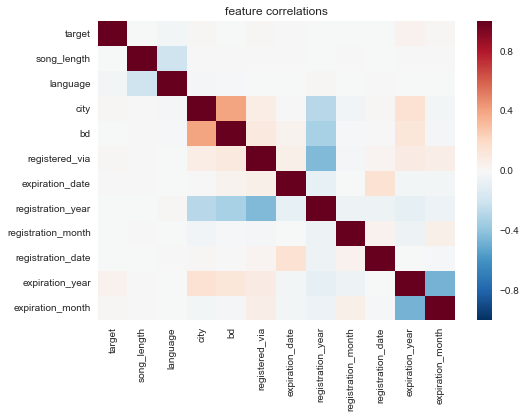

In [100]:
plt.show()

In [101]:
#### bd has otlier values 
max(train['bd'])

1051

In [102]:
min(train['bd'])

-43

In [103]:
#### see the summary stats of the variables 
train.describe()


,target,song_length,language,city,bd,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
count,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06
mean,5.035171e-01,2.451172e+05,1.860893e+01,7.511399e+00,1.753927e+01,6.794068e+00,1.562338e+01,2.012741e+03,6.832306e+00,1.581532e+01,2.017072e+03,8.341742e+00
std,4.999877e-01,6.735108e+04,2.117677e+01,6.641625e+00,2.155447e+01,2.275774e+00,9.107235e+00,3.018861e+00,3.700723e+00,8.768549e+00,3.982536e-01,2.511360e+00
min,0.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-4.300000e+01,3.000000e+00,1.000000e+00,2.004000e+03,1.000000e+00,1.000000e+00,1.970000e+03,1.000000e+00
25%,0.000000e+00,2.147260e+05,3.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,8.000000e+00,2.011000e+03,3.000000e+00,8.000000e+00,2.017000e+03,9.000000e+00
50%,1.000000e+00,2.418120e+05,3.000000e+00,5.000000e+00,2.100000e+01,7.000000e+00,1.500000e+01,2.013000e+03,7.000000e+00,1.600000e+01,2.017000e+03,9.000000e+00
75%,1.000000e+00,2.721600e+05,5.200000e+01,1.300000e+01,2.900000e+01,9.000000e+00,2.300000e+01,2.015000e+03,1.000000e+01,2.300000e+01,2.017000e+03,1.000000e+01
max,1.000000e+00,1.085171e+07,5.900000e+01,2.200000e+01,1.051000e+03,1.300000e+01,3.100000e+01,2.017000e+03,1.200000e+01,3.100000e+01,2.020000e+03,1.200000e+01


In [104]:
test.describe()

,id,song_length,language,city,bd,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
count,2.556790e+06,2.556790e+06,2.556790e+06,2.556790e+06,2.556790e+06,2.556790e+06,2.556790e+06,2.556790e+06,2.556790e+06,2.556790e+06,2.556790e+06,2.556790e+06
mean,1.278394e+06,2.438412e+05,1.996868e+01,7.421128e+00,1.740118e+01,6.786635e+00,1.554911e+01,2.012864e+03,6.520765e+00,1.580358e+01,2.017093e+03,8.281040e+00
std,7.380818e+05,7.335411e+04,2.161927e+01,6.669526e+00,2.221715e+01,2.266561e+00,9.077409e+00,3.104494e+00,3.744160e+00,8.806635e+00,3.676431e-01,2.447882e+00
min,0.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-4.300000e+01,3.000000e+00,1.000000e+00,2.004000e+03,1.000000e+00,1.000000e+00,2.005000e+03,1.000000e+00
25%,6.391972e+05,2.132520e+05,3.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,8.000000e+00,2.011000e+03,3.000000e+00,8.000000e+00,2.017000e+03,8.000000e+00
50%,1.278394e+06,2.392810e+05,3.000000e+00,5.000000e+00,2.100000e+01,7.000000e+00,1.500000e+01,2.013000e+03,7.000000e+00,1.600000e+01,2.017000e+03,9.000000e+00
75%,1.917592e+06,2.704190e+05,5.200000e+01,1.300000e+01,2.900000e+01,9.000000e+00,2.300000e+01,2.015000e+03,1.000000e+01,2.300000e+01,2.017000e+03,1.000000e+01
max,2.556789e+06,7.356917e+06,5.900000e+01,2.200000e+01,1.051000e+03,1.600000e+01,3.100000e+01,2.017000e+03,1.200000e+01,3.100000e+01,2.020000e+03,1.200000e+01


In [105]:
median = train.loc[train['bd']<75, 'bd'].median()
#df.loc[df.Age > 75, 'Age'] = np.nan
#df.fillna(median,inplace=True)

In [106]:
median

21.0

In [107]:
train.loc[train.bd >90,'bd'] = np.nan

In [108]:
train.loc[train.bd <5 , 'bd'] = np.nan

In [109]:
train['bd'].fillna(median,inplace=True)

In [110]:
test.loc[test.bd > 90 , 'bd'] = np.nan

In [111]:
test.loc[test.bd <5 , 'bd'] = np.nan

In [112]:
test['bd'].fillna(median,inplace=True)

In [113]:
train.describe()
####3 to check max and min of bd


,target,song_length,language,city,bd,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
count,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06
mean,5.035171e-01,2.451172e+05,1.860893e+01,7.511399e+00,2.563708e+01,6.794068e+00,1.562338e+01,2.012741e+03,6.832306e+00,1.581532e+01,2.017072e+03,8.341742e+00
std,4.999877e-01,6.735108e+04,2.117677e+01,6.641625e+00,7.673249e+00,2.275774e+00,9.107235e+00,3.018861e+00,3.700723e+00,8.768549e+00,3.982536e-01,2.511360e+00
min,0.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,5.000000e+00,3.000000e+00,1.000000e+00,2.004000e+03,1.000000e+00,1.000000e+00,1.970000e+03,1.000000e+00
25%,0.000000e+00,2.147260e+05,3.000000e+00,1.000000e+00,2.100000e+01,4.000000e+00,8.000000e+00,2.011000e+03,3.000000e+00,8.000000e+00,2.017000e+03,9.000000e+00
50%,1.000000e+00,2.418120e+05,3.000000e+00,5.000000e+00,2.100000e+01,7.000000e+00,1.500000e+01,2.013000e+03,7.000000e+00,1.600000e+01,2.017000e+03,9.000000e+00
75%,1.000000e+00,2.721600e+05,5.200000e+01,1.300000e+01,2.900000e+01,9.000000e+00,2.300000e+01,2.015000e+03,1.000000e+01,2.300000e+01,2.017000e+03,1.000000e+01
max,1.000000e+00,1.085171e+07,5.900000e+01,2.200000e+01,9.000000e+01,1.300000e+01,3.100000e+01,2.017000e+03,1.200000e+01,3.100000e+01,2.020000e+03,1.200000e+01


In [114]:
train.isnull().sum()

msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
artist_name           0
genre_ids             0
song_length           0
language              0
city                  0
bd                    0
gender                0
registered_via        0
expiration_date       0
registration_year     0
registration_month    0
registration_date     0
expiration_year       0
expiration_month      0
dtype: int64

In [117]:
#### Intersection of number of members in train and test set
len(pd.Series(list(set(train['msno']).intersection(test['msno']))))

21483

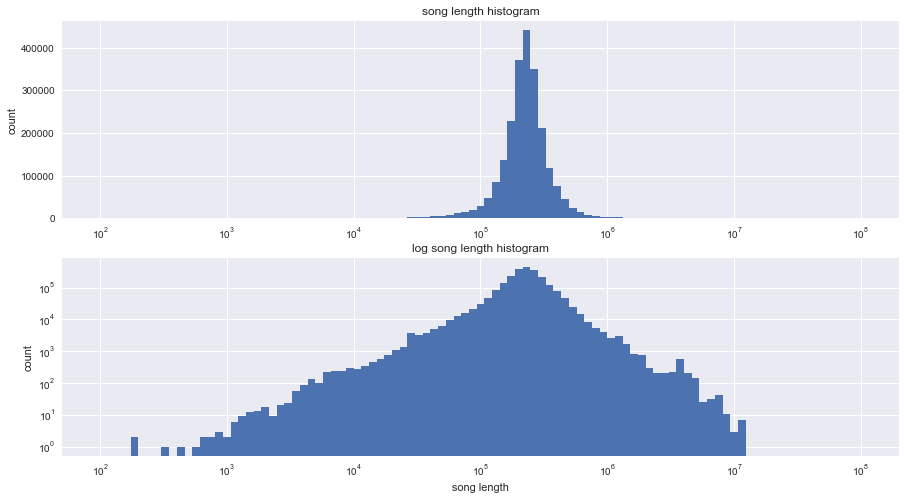

In [118]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)    ### basically means 2 rows and 1 column (1 below each other)
bins = np.logspace(2,8, 100)   ### generates 100 equally spaced numbers which have log values b/w 2 and 8 --song length b/w 100 and 10^8
plt.hist(songs.song_length.values, bins=bins, log=False);
plt.xscale('log')
plt.title("song length histogram"); plt.ylabel("count");


#####log : boolean, optional
#####If True, the histogram axis (y-axis) will be set to a log scale. If log is True and x is a 1D array, 
#####empty bins will be filtered out and only the non-empty (n, bins, patches) will be returned.
#####Default is False

plt.subplot(2,1,2)   #### in 2 rows and 1 column ,the second figure
bins = np.logspace(2,8, 100)
plt.hist(songs.song_length.values, bins=bins, log=True);
plt.xscale('log')
plt.title("log song length histogram"); plt.xlabel("song length"); plt.ylabel("count")
np.unique(songs['song_length']) ### hence the decision of bins lying between 100 and 10^8
plt.show()

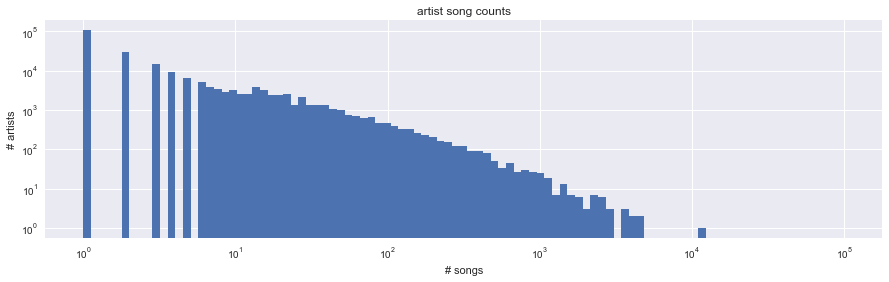

In [119]:
plt.figure(figsize=(15,4))
artist_song_counts = list(songs["artist_name"].value_counts())
bins = np.logspace(0,5, 100)
plt.hist(artist_song_counts, bins=bins, log=True);
plt.xscale('log')
plt.title("artist song counts"); 
plt.xlabel("# songs"); plt.ylabel("# artists");
plt.show()

In [120]:
plt.figure(figsize=(15,4))
user_song_counts = list(train["msno"].value_counts())
plt.figure(figsize=(15,6))

plt.subplot(2,1,1)
bins = np.logspace(0,5, 100)
plt.hist(user_song_counts, bins=bins, log=True);
plt.xscale('log')
plt.title("user song counts"); 
plt.ylabel("# users");

plt.subplot(2,1,2)
bins = np.logspace(0,5, 100)
plt.hist(user_song_counts, bins=bins, log=False);
plt.xscale('log')
plt.title("user song counts"); 
plt.xlabel("# songs"); plt.ylabel("# users");

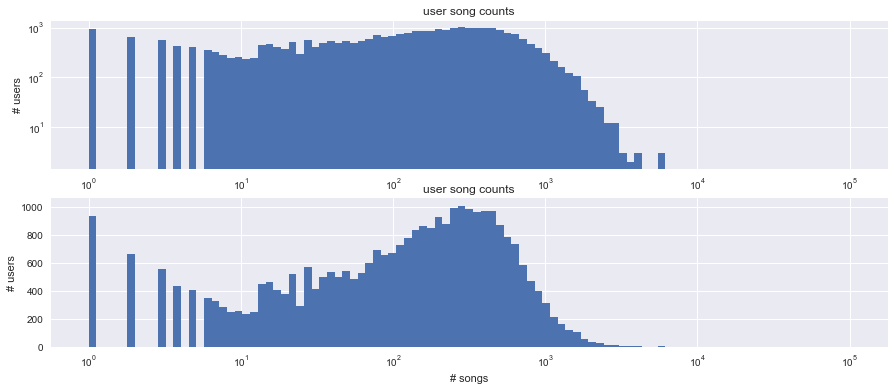

In [121]:
plt.show()

In [122]:
##### checking obseravvtions per customer
train["msno"].value_counts()

MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=    5819
o+5RNlSWrzvrphgBNGIo1FLkGxBgyICns6qXj3nS7Pk=    5537
FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=    5511
KGXNZ/H3VxvET/+rGxlrAe7Gpz2eKMXyuSg3xh8Ij1M=    4217
cqjRBV/jWN2ujhc+z/4tz+Mj6xEfflAAt6qBXCqxKvw=    4008
hYJpPvGod6vy09TnlXdQe3Q0vlxju5u5Ruf8V2XkTio=    3926
SZ5NNypqaTWljFO1HiVZwkw3713+rM9x/JNdJd8/fzc=    3733
dU4RbzpIRRd/EkA9Xncpy9CglzDBZp7nKMfdnfr3Aj8=    3686
OOUnJuX4SteRhUdJZ9B2DqtfiwsfcZVBefEhXLeBsFg=    3239
frZtrrN1Y2ZqZX3VFiq7FpAvLth3kZJNovT9cmyn2O4=    3177
7xiBI5xU3P2/IiR9teB7jySfzWo96JGikGajteLd3Cs=    3133
4tuTIArXO3WO8/zS9y2CC34ywEfChjAKUchlKW00DMM=    3030
JkQacE3rvmhh65R04eDLbu+M7MCkpzmHwMGrbZo0puc=    3027
gxxBbzV3eE2XGjUrFVB2FzAve55Oe1s86HD+OEh36Gw=    2973
1d4acB2bhEZCFjSRwvO4ls8PrBtvNTlkcAcxYx8FcWE=    2930
jL7ukei/Kb4gDCfTG4+VhV4TzLaDecjji/aW+GqWvac=    2922
y3IT85vrzY2iBxFg6nsh4Cmg+mV3oqR73TPekK7x1Rc=    2895
YU6fAgCFgPkaJ1YSW2838KzGTxmBCfgousTO8jwuHYM=    2883
TxneOykZ/MOIbQmA/aJ4EUQUIR9r+Egt6TNQu0WgwpA=  

In [123]:
cols = list(train.columns)
cols.remove('target')

In [129]:
train.dtypes

msno                   object
song_id                object
source_system_tab      object
source_screen_name     object
source_type            object
target                  int64
artist_name            object
genre_ids              object
song_length           float64
language              float64
city                    int64
bd                    float64
gender                 object
registered_via          int64
expiration_date         int64
registration_year       int64
registration_month      int64
registration_date       int64
expiration_year         int64
expiration_month        int64
dtype: object

In [142]:
train['msno']=train['msno'].apply(str)

In [145]:
#####Instantly make your loops show a smart progress meter - just wrap any iterable with “tqdm(iterable)”, and you’re done!
#### Label Encoder :Encode labels with value between 0 and n_classes-1.
from tqdm import tqdm
for col in tqdm(cols):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|██████████| 19/19 [02:27<00:00,  7.75s/it]


In [146]:
train.describe()

#### can see min of all categorical variables is 0 and max is (n-1)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,artist_name,genre_ids,song_length,language,city,bd,gender,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
count,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06
mean,1.725623e+04,2.092277e+05,3.565428e+00,9.134998e+00,5.727102e+00,5.035171e-01,3.186598e+04,3.459074e+02,2.451172e+05,1.860893e+01,7.511399e+00,2.563708e+01,9.100151e-01,6.794068e+00,1.562338e+01,2.012741e+03,6.832306e+00,1.581532e+01,2.017072e+03,8.341742e+00
std,9.937277e+03,1.211235e+05,2.138808e+00,4.722913e+00,2.456921e+00,4.999877e-01,1.449066e+04,1.085772e+02,6.735108e+04,2.117677e+01,6.641625e+00,7.673249e+00,8.395044e-01,2.275774e+00,9.107235e+00,3.018861e+00,3.700723e+00,8.768549e+00,3.982536e-01,2.511360e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,2.004000e+03,1.000000e+00,1.000000e+00,1.970000e+03,1.000000e+00
25%,8.676000e+03,1.037820e+05,1.000000e+00,9.000000e+00,4.000000e+00,0.000000e+00,2.056300e+04,3.650000e+02,2.147260e+05,3.000000e+00,1.000000e+00,2.100000e+01,0.000000e+00,4.000000e+00,8.000000e+00,2.011000e+03,3.000000e+00,8.000000e+00,2.017000e+03,9.000000e+00
50%,1.734600e+04,2.084810e+05,4.000000e+00,9.000000e+00,5.000000e+00,1.000000e+00,4.003900e+04,3.720000e+02,2.418120e+05,3.000000e+00,5.000000e+00,2.100000e+01,1.000000e+00,7.000000e+00,1.500000e+01,2.013000e+03,7.000000e+00,1.600000e+01,2.017000e+03,9.000000e+00
75%,2.591300e+04,3.125250e+05,4.000000e+00,1.200000e+01,7.000000e+00,1.000000e+00,4.291100e+04,3.720000e+02,2.721600e+05,5.200000e+01,1.300000e+01,2.900000e+01,2.000000e+00,9.000000e+00,2.300000e+01,2.015000e+03,1.000000e+01,2.300000e+01,2.017000e+03,1.000000e+01
max,3.440200e+04,4.198380e+05,9.000000e+00,2.200000e+01,1.200000e+01,1.000000e+00,4.637200e+04,6.080000e+02,1.085171e+07,5.900000e+01,2.200000e+01,9.000000e+01,2.000000e+00,1.300000e+01,3.100000e+01,2.017000e+03,1.200000e+01,3.100000e+01,2.020000e+03,1.200000e+01


In [147]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,artist_name,genre_ids,song_length,language,city,bd,gender,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,9176,86884,2,8,7,1,3785,308,206471.0,52.0,1,21.0,0,7,5,2012,1,2,2017,10
1,19273,260594,4,9,5,1,36868,98,284584.0,52.0,13,24.0,1,9,11,2011,5,25,2017,9
2,19273,140755,4,9,5,1,24602,98,225396.0,52.0,13,24.0,1,9,11,2011,5,25,2017,9
3,19273,27577,4,9,5,1,31652,7,255512.0,-1.0,13,24.0,1,9,11,2011,5,25,2017,9
4,9176,38706,2,8,7,1,5191,3,187802.0,52.0,1,21.0,0,7,5,2012,1,2,2017,10


In [148]:
import lightgbm as lgb

X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

In [149]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type,artist_name,genre_ids,song_length,language,city,bd,gender,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,0,17724,228222,4,9,4,42813,365,224130.0,3.0,1,21.0,0,7,18,2016,2,19,2017,9
1,1,17724,407039,4,9,4,42633,372,320470.0,3.0,1,21.0,0,7,18,2016,2,19,2017,9
2,2,977,70211,1,0,10,38493,201,315899.0,17.0,1,21.0,0,4,24,2016,11,17,2016,11
3,3,1878,419092,7,17,8,36424,372,285210.0,52.0,3,30.0,2,9,30,2007,7,25,2017,4
4,4,1878,160096,7,17,8,38299,520,197590.0,-1.0,3,30.0,2,9,30,2007,7,25,2017,4


In [150]:
X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

In [166]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, \
    test_size=0.2, random_state = 12)
    
#del X, y; gc.collect();


d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid)

In [167]:
train.describe()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,artist_name,genre_ids,song_length,language,city,bd,gender,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
count,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06
mean,1.725623e+04,2.092277e+05,3.565428e+00,9.134998e+00,5.727102e+00,5.035171e-01,3.186598e+04,3.459074e+02,2.451172e+05,1.860893e+01,7.511399e+00,2.563708e+01,9.100151e-01,6.794068e+00,1.562338e+01,2.012741e+03,6.832306e+00,1.581532e+01,2.017072e+03,8.341742e+00
std,9.937277e+03,1.211235e+05,2.138808e+00,4.722913e+00,2.456921e+00,4.999877e-01,1.449066e+04,1.085772e+02,6.735108e+04,2.117677e+01,6.641625e+00,7.673249e+00,8.395044e-01,2.275774e+00,9.107235e+00,3.018861e+00,3.700723e+00,8.768549e+00,3.982536e-01,2.511360e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,2.004000e+03,1.000000e+00,1.000000e+00,1.970000e+03,1.000000e+00
25%,8.676000e+03,1.037820e+05,1.000000e+00,9.000000e+00,4.000000e+00,0.000000e+00,2.056300e+04,3.650000e+02,2.147260e+05,3.000000e+00,1.000000e+00,2.100000e+01,0.000000e+00,4.000000e+00,8.000000e+00,2.011000e+03,3.000000e+00,8.000000e+00,2.017000e+03,9.000000e+00
50%,1.734600e+04,2.084810e+05,4.000000e+00,9.000000e+00,5.000000e+00,1.000000e+00,4.003900e+04,3.720000e+02,2.418120e+05,3.000000e+00,5.000000e+00,2.100000e+01,1.000000e+00,7.000000e+00,1.500000e+01,2.013000e+03,7.000000e+00,1.600000e+01,2.017000e+03,9.000000e+00
75%,2.591300e+04,3.125250e+05,4.000000e+00,1.200000e+01,7.000000e+00,1.000000e+00,4.291100e+04,3.720000e+02,2.721600e+05,5.200000e+01,1.300000e+01,2.900000e+01,2.000000e+00,9.000000e+00,2.300000e+01,2.015000e+03,1.000000e+01,2.300000e+01,2.017000e+03,1.000000e+01
max,3.440200e+04,4.198380e+05,9.000000e+00,2.200000e+01,1.200000e+01,1.000000e+00,4.637200e+04,6.080000e+02,1.085171e+07,5.900000e+01,2.200000e+01,9.000000e+01,2.000000e+00,1.300000e+01,3.100000e+01,2.017000e+03,1.200000e+01,3.100000e+01,2.020000e+03,1.200000e+01


In [168]:
X.shape

(7377418, 19)

In [169]:
y.shape

(7377418,)

In [171]:
watchlist = [d_train, d_valid]


print('Training LGBM model...')
params = {}
params['learning_rate'] = 0.05
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'



#### try to run with cv

"""
Yes! That method is known as “k- fold cross validation”. It’s easy to follow and implement. Here are the quick steps:

Randomly split your entire dataset into k”folds”.
For each k folds in your dataset, build your model on k – 1 folds of the data set. Then, test the model to check the effectiveness for kth fold.
Record the error you see on each of the predictions.
Repeat this until each of the k folds has served as the test set.
#### The average of your k recorded errors##### is called the cross-validation error and will serve as your performance metric for the model.
"""
data_train = lgb.Dataset(X, label=y)


model2 = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist, \
early_stopping_rounds=10, verbose_eval=10)

Training LGBM model...
Training until validation scores don't improve for 10 rounds.
[10]	training's auc: 0.687327	valid_1's auc: 0.687574
[20]	training's auc: 0.692346	valid_1's auc: 0.692474
[30]	training's auc: 0.697062	valid_1's auc: 0.697099
[40]	training's auc: 0.701247	valid_1's auc: 0.701209
[50]	training's auc: 0.704647	valid_1's auc: 0.704504
[60]	training's auc: 0.707955	valid_1's auc: 0.707657
[70]	training's auc: 0.711792	valid_1's auc: 0.71133
[80]	training's auc: 0.715057	valid_1's auc: 0.714444
[90]	training's auc: 0.717992	valid_1's auc: 0.717247
[100]	training's auc: 0.72073	valid_1's auc: 0.719879
[110]	training's auc: 0.723342	valid_1's auc: 0.722362
[120]	training's auc: 0.725472	valid_1's auc: 0.724384
[130]	training's auc: 0.727465	valid_1's auc: 0.726265
[140]	training's auc: 0.729696	valid_1's auc: 0.728358
[150]	training's auc: 0.731725	valid_1's auc: 0.730243
[160]	training's auc: 0.733575	valid_1's auc: 0.73198
[170]	training's auc: 0.735569	valid_1's auc: 0

In [172]:
print('Making predictions and saving them...')

p_test = model2.predict(X_test)


Making predictions and saving them...


In [173]:
subm = pd.DataFrame()
subm['id'] = ids
subm['target'] = p_test
subm.to_csv('submission.csv.gz', compression = 'gzip', index=False, float_format = '%.5f')
print('Done!')

Done!


In [175]:
max(p_test)

0.92667131846719153

In [176]:
min(p_test)

0.068292191537521724

In [193]:
#### to check how many values have >0.5 in the darray p_test
a=sum(float(num) > 0.5 for num in p_test)

In [194]:
from __future__ import division   #### otherwise don't get to see decimal points
a/len(p_test) ### seems to give a balanced cutofff in test set 

0.40889865808298687

In [196]:
#convert into binary values
for i in range(0,2556790):
    if p_test[i]>.5:       # setting threshold to .5
       p_test[i]=1
    else:  
       p_test[i]=0

In [200]:
subm = pd.DataFrame()
subm['id'] = ids
subm['target'] = p_test
subm.to_csv('submission.csv.gz', compression = 'gzip', index=False, float_format = '%.5f')
print('Done!')

Done!


In [198]:
max(p_test)

1.0

In [199]:

min(p_test)

0.0

In [209]:
print('Training LGBM model...')
params = {}
params['learning_rate'] = 0.09
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'



model3 = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist, \
early_stopping_rounds=10, verbose_eval=10)


Training LGBM model...
Training until validation scores don't improve for 10 rounds.
[10]	training's auc: 0.690796	valid_1's auc: 0.69084
[20]	training's auc: 0.69868	valid_1's auc: 0.698525
[30]	training's auc: 0.705939	valid_1's auc: 0.705608
[40]	training's auc: 0.711965	valid_1's auc: 0.711478
[50]	training's auc: 0.71789	valid_1's auc: 0.71716
[60]	training's auc: 0.722483	valid_1's auc: 0.721537
[70]	training's auc: 0.726832	valid_1's auc: 0.72565
[80]	training's auc: 0.730237	valid_1's auc: 0.728843
[90]	training's auc: 0.73406	valid_1's auc: 0.732437
[100]	training's auc: 0.737045	valid_1's auc: 0.73517
[110]	training's auc: 0.740594	valid_1's auc: 0.738487
[120]	training's auc: 0.743158	valid_1's auc: 0.740863
[130]	training's auc: 0.745143	valid_1's auc: 0.742638
[140]	training's auc: 0.747607	valid_1's auc: 0.744903
[150]	training's auc: 0.749778	valid_1's auc: 0.7469
[160]	training's auc: 0.751856	valid_1's auc: 0.748796
[170]	training's auc: 0.753329	valid_1's auc: 0.75006

In [228]:
print('Training LGBM model...')
params = {}
params['learning_rate'] = 0.1
params['application'] = 'binary'
params['max_depth'] = 20
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'
params['max_bin']=80



model4 = lgb.train(params, train_set=d_train, num_boost_round=5000, valid_sets=watchlist, \
early_stopping_rounds=10, verbose_eval=10)

Training LGBM model...
Training until validation scores don't improve for 10 rounds.
[10]	training's auc: 0.692634	valid_1's auc: 0.692752
[20]	training's auc: 0.702218	valid_1's auc: 0.702141
[30]	training's auc: 0.709663	valid_1's auc: 0.709283
[40]	training's auc: 0.717313	valid_1's auc: 0.716657
[50]	training's auc: 0.723216	valid_1's auc: 0.722345
[60]	training's auc: 0.728597	valid_1's auc: 0.727501
[70]	training's auc: 0.733	valid_1's auc: 0.731616
[80]	training's auc: 0.737347	valid_1's auc: 0.735741
[90]	training's auc: 0.74086	valid_1's auc: 0.738978
[100]	training's auc: 0.743896	valid_1's auc: 0.741805
[110]	training's auc: 0.746274	valid_1's auc: 0.743942
[120]	training's auc: 0.748753	valid_1's auc: 0.746182
[130]	training's auc: 0.751	valid_1's auc: 0.748201
[140]	training's auc: 0.753225	valid_1's auc: 0.750205
[150]	training's auc: 0.755329	valid_1's auc: 0.752039
[160]	training's auc: 0.75727	valid_1's auc: 0.753763
[170]	training's auc: 0.758856	valid_1's auc: 0.7551

[1490]	training's auc: 0.836455	valid_1's auc: 0.808024
[1500]	training's auc: 0.836692	valid_1's auc: 0.808081
[1510]	training's auc: 0.836996	valid_1's auc: 0.808198
[1520]	training's auc: 0.837215	valid_1's auc: 0.808223
[1530]	training's auc: 0.837543	valid_1's auc: 0.808412
[1540]	training's auc: 0.837766	valid_1's auc: 0.808478
[1550]	training's auc: 0.838037	valid_1's auc: 0.80856
[1560]	training's auc: 0.838287	valid_1's auc: 0.808633
[1570]	training's auc: 0.838555	valid_1's auc: 0.808751
[1580]	training's auc: 0.838894	valid_1's auc: 0.808963
[1590]	training's auc: 0.839251	valid_1's auc: 0.80917
[1600]	training's auc: 0.839539	valid_1's auc: 0.809313
[1610]	training's auc: 0.839824	valid_1's auc: 0.809441
[1620]	training's auc: 0.840095	valid_1's auc: 0.809525
[1630]	training's auc: 0.840331	valid_1's auc: 0.809606
[1640]	training's auc: 0.840547	valid_1's auc: 0.809656
[1650]	training's auc: 0.84079	valid_1's auc: 0.809724
[1660]	training's auc: 0.840988	valid_1's auc: 0.80

In [229]:
print('Making predictions and saving them...')

p_test = model4.predict(X_test)


Making predictions and saving them...


In [230]:
#### to check how many values have >0.5 in the darray p_test
sum(float(num) > 0.5 for num in p_test)/len(p_test)

0.3908525925085752

In [231]:
#convert into binary values
for i in range(0,2556790):
    if p_test[i]>.5:       # setting threshold to .5
       p_test[i]=1
    else:  
       p_test[i]=0

In [232]:
subm = pd.DataFrame()
subm['id'] = ids
subm['target'] = p_test
subm.to_csv('submission.csv.gz', compression = 'gzip', index=False, float_format = '%.5f')
print('Done!')

Done!


In [233]:
##### Seeing how predictions are made


print('Training LGBM model...')
params = {}
params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 2
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model1 = lgb.train(params, train_set=d_train, num_boost_round=3, valid_sets=watchlist, \
early_stopping_rounds=1, verbose_eval=1)

print('Done!')

Training LGBM model...
[1]	training's auc: 0.635994	valid_1's auc: 0.636465
Training until validation scores don't improve for 1 rounds.
[2]	training's auc: 0.636663	valid_1's auc: 0.637119
[3]	training's auc: 0.639338	valid_1's auc: 0.639932
Done!


In [236]:
print('Plot 1st tree with graphviz...')
graph = lgb.create_tree_digraph(model1, tree_index=0, name='Tree1')
graph
graph.render(view=True)

Plot 1st tree with graphviz...


'Tree1.gv.pdf'

In [237]:
print('Plot 1st tree with graphviz...')
graph = lgb.create_tree_digraph(model1, tree_index=1, name='Tree2')
graph
graph.render(view=True)

Plot 1st tree with graphviz...


'Tree2.gv.pdf'

In [238]:
print('Plot 1st tree with graphviz...')
graph = lgb.create_tree_digraph(model1, tree_index=2, name='Tree3')
graph
graph.render(view=True)

Plot 1st tree with graphviz...


'Tree3.gv.pdf'

In [239]:
print('Making predictions and saving them...')
p_test_check = model1.predict(X_test)

Making predictions and saving them...


In [240]:
X_test[0]

array([  1.77240000e+04,   2.28222000e+05,   4.00000000e+00,
         9.00000000e+00,   4.00000000e+00,   4.28130000e+04,
         3.65000000e+02,   2.24130000e+05,   3.00000000e+00,
         1.00000000e+00,   2.10000000e+01,   0.00000000e+00,
         7.00000000e+00,   1.80000000e+01,   2.01600000e+03,
         2.00000000e+00,   1.90000000e+01,   2.01700000e+03,
         9.00000000e+00])

In [254]:
p_test_check[0]

0.60922584922166978

In [252]:
0.224697137965+0.136908160707+0.0824539792641


0.4440592779361

In [255]:
1/(1+np.exp(-0.4440592779361))

0.60922584922178491

In [247]:
model1.feature_name()

[u'Column_0',
 u'Column_1',
 u'Column_2',
 u'Column_3',
 u'Column_4',
 u'Column_5',
 u'Column_6',
 u'Column_7',
 u'Column_8',
 u'Column_9',
 u'Column_10',
 u'Column_11',
 u'Column_12',
 u'Column_13',
 u'Column_14',
 u'Column_15',
 u'Column_16',
 u'Column_17',
 u'Column_18']

In [265]:
#### using decision trees
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [268]:
prediction=clf.predict(X_test)


In [269]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

/Users/eswaroo/anaconda/envs/py_env/lib/python2.7/site-packages/sklearn/tree/export.py:386: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)
